In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries

from darts.models import LightGBMModel, Prophet

from darts.dataprocessing.transformers import Scaler, StaticCovariatesTransformer
from darts.dataprocessing import Pipeline

In [3]:
absences_df = pd.read_csv('../../data/processed/absences_count.csv')
absences_df

,date,count
0,2020-01-02,2
1,2020-01-03,2
2,2020-01-04,2
3,2020-01-15,4
4,2020-01-16,4
...,...,...
1452,2024-01-03,51
1453,2024-01-04,45
1454,2024-01-05,32
1455,2024-01-06,21


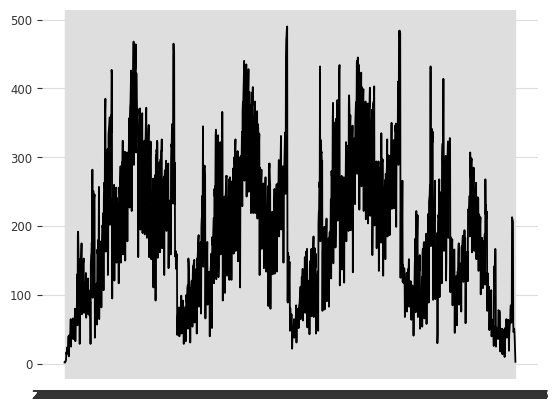

In [7]:
plt.plot(absences_df['date'], absences_df['count'])

In [13]:
series = TimeSeries.from_dataframe(absences_df, time_col='date', value_cols='count', fill_missing_dates=True, freq='D')

In [10]:
models = [LightGBMModel(), Prophet()]

backtests = [model.historical_forecasts(series,
                            start=.7,
                            forecast_horizon=3)
             for model in models]

ValueError: At least one of `lags`, `lags_future_covariates` or `lags_past_covariates` must be not None.


ValueError: At least one of `lags`, `lags_future_covariates` or `lags_past_covariates` must be not None.

In [ ]:
pipeline = Pipeline([Scaler(), StaticCovariatesTransformer()]) # MinMaxScaler
train_dataset_ts_prepared = pipeline.fit_transform(train_dataset_ts_month)
test_dataset_ts_prepared = pipeline.transform(test_dataset_ts_month)

In [ ]:

model_lightGBM = LightGBMModel(lags=2, 
                            output_chunk_length=18, 
                            random_state=0,
                            multi_models=False, 
                            #lags_past_covariates=past_lags,
                            #lags_future_covariates=future_lags,
                            add_encoders={"cyclic": {"future": ["month"]}, 
                                         'datetime_attribute': {'future': ['dayofweek']},
                                         'position': {'past': ['relative'], 'future': ['relative']},}
                                         #'transformer': Scaler()}
                            )

model_lightGBM.fit(series=train_dataset)
prediction_lightGBM = model_lightGBM.predict(n=forecast_horizons, series=train_dataset)
prediction_lightGBM = pipeline.inverse_transform(prediction_lightGBM)